In [85]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Pair programming Preprocesado
### Ana Gonzalez y Ana Campos

En esta lección realizaremos los cambios oportunos para poder ejecutar el modelo de regresión logística.
Cuando nos enfrentamos a problemas de regresión lineal vimos que eran necesarios algunos cambios antes de poder ajustar los modelos.

En el caso de la regresión logística lo tendremos que hacer.

Estos cambios incluyen:

- **Estandarización** de las variables predictoras numéricas
- **Codificación** de las variables categóricas
- **Balanceo** de la variable respuesta

In [86]:
# cargamos el conjunto de datos que guardamos en la lección anterior
df = pd.read_pickle("../data-log/01-dataframe.pickle")
df.head()

,sex,is_smoking,education,id,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,F,YES,2.0,0.0,64.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,26.060925,90.0,80.0,1.0
1,F,YES,1.0,2.0,46.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0
2,F,YES,1.0,4.0,64.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0.0
3,M,YES,4.0,7.0,36.0,35.0,0.0,0.0,0.0,0.0,295.0,102.0,68.0,28.150000,60.0,63.0,0.0
4,F,YES,2.0,8.0,41.0,20.0,0.0,0.0,0.0,0.0,220.0,126.0,78.0,20.700000,86.0,79.0,0.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              3390 non-null   category
 1   is_smoking       3390 non-null   category
 2   education        3390 non-null   category
 3   id               3390 non-null   float64 
 4   age              3390 non-null   float64 
 5   cigsPerDay       3390 non-null   float64 
 6   BPMeds           3390 non-null   category
 7   prevalentStroke  3390 non-null   category
 8   prevalentHyp     3390 non-null   category
 9   diabetes         3390 non-null   category
 10  totChol          3390 non-null   float64 
 11  sysBP            3390 non-null   float64 
 12  diaBP            3390 non-null   float64 
 13  BMI              3390 non-null   float64 
 14  heartRate        3390 non-null   float64 
 15  glucose          3390 non-null   float64 
 16  TenYearCHD       3390 non-null   category


In [88]:
df.columns

Index(['sex', 'is_smoking', 'education', 'id', 'age', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [89]:
df=df[['id','sex','education',  'age','is_smoking' ,'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes','glucose',  'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'TenYearCHD']]
df.head()

,id,sex,education,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0.0,F,2.0,64.0,YES,3.0,0.0,0.0,0.0,0.0,80.0,221.0,148.0,85.0,26.060925,90.0,1.0
1,2.0,F,1.0,46.0,YES,10.0,0.0,0.0,0.0,0.0,94.0,250.0,116.0,71.0,20.350000,88.0,0.0
2,4.0,F,1.0,64.0,YES,30.0,0.0,0.0,0.0,0.0,77.0,241.0,136.5,85.0,26.420000,70.0,0.0
3,7.0,M,4.0,36.0,YES,35.0,0.0,0.0,0.0,0.0,63.0,295.0,102.0,68.0,28.150000,60.0,0.0
4,8.0,F,2.0,41.0,YES,20.0,0.0,0.0,0.0,0.0,79.0,220.0,126.0,78.0,20.700000,86.0,0.0


In [90]:
df_copia=df.copy()

# Estandarización

In [91]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [92]:
# recordemos que la estandarización solo se hace para las variables predictoras numéricas

numericas = df.select_dtypes(include = np.number)
numericas.head()

,id,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,64.0,3.0,80.0,221.0,148.0,85.0,26.060925,90.0
1,2.0,46.0,10.0,94.0,250.0,116.0,71.0,20.350000,88.0
2,4.0,64.0,30.0,77.0,241.0,136.5,85.0,26.420000,70.0
3,7.0,36.0,35.0,63.0,295.0,102.0,68.0,28.150000,60.0
4,8.0,41.0,20.0,79.0,220.0,126.0,78.0,20.700000,86.0


In [93]:
# Si queremos eliminar alguna columna
numericas.drop(["id"], axis = 1, inplace = True)

In [94]:
# ahora ya podemos ajustar nuestros datos.  

scaler.fit(numericas)

# transformamos los datos

X_escaladas = scaler.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,1.682783,-0.506751,-0.077350,-0.358276,0.690879,0.176093,0.064553,1.171617
1,-0.412284,0.083414,0.523186,0.286026,-0.744824,-0.988457,-1.325505,1.004509


In [95]:
# dropeamos las columnas sin estandarizar

df.drop(['age',	'cigsPerDay',	'glucose'	,'totChol',	'sysBP'	,'diaBP',	'BMI',	'heartRate'], axis = 1, inplace=True)
df.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0.0,F,2.0,YES,0.0,0.0,0.0,0.0,1.0
1,2.0,F,1.0,YES,0.0,0.0,0.0,0.0,0.0
2,4.0,F,1.0,YES,0.0,0.0,0.0,0.0,0.0
3,7.0,M,4.0,YES,0.0,0.0,0.0,0.0,0.0
4,8.0,F,2.0,YES,0.0,0.0,0.0,0.0,0.0


In [96]:
# lo unimos al dataframe original 

df = pd.concat([df, numericas_estandar], axis = 1)
# chequeamos que esta todo bien
df.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,F,2.0,YES,0.0,0.0,0.0,0.0,1.0,1.682783,-0.506751,-0.077350,-0.358276,0.690879,0.176093,0.064553,1.171617
1,2.0,F,1.0,YES,0.0,0.0,0.0,0.0,0.0,-0.412284,0.083414,0.523186,0.286026,-0.744824,-0.988457,-1.325505,1.004509
2,4.0,F,1.0,YES,0.0,0.0,0.0,0.0,0.0,1.682783,1.769600,-0.206036,0.086070,0.174923,0.176093,0.151952,-0.499456
3,7.0,M,4.0,YES,0.0,0.0,0.0,0.0,0.0,-1.576210,2.191146,-0.806571,1.285805,-1.372943,-1.238003,0.573040,-1.334993
4,8.0,F,2.0,YES,0.0,0.0,0.0,0.0,0.0,-0.994247,0.926507,-0.120245,-0.380493,-0.296167,-0.406182,-1.240314,0.837402


-------------------------------------------------------------

Vamos a aplicar esta codificación al *dataframe* original, el objetivo, tener dos datasets: 

- Uno con las variables categóricas codificadas y las numéricas estandarizadas.

- Unos con las variables categóricas codificadas y las numéricas sin estandarizar.  


Con estos dos csv ajustaremos nuestro modelo de regresión logística para comparar que modelo es mejor y como pueden cambiar las métricas. 

# Codificacion con datos ESTANDARIZADOS

Variables con orden: sexo, habito tabaquico

In [97]:
map_sex = {"M": 0, "F": 1}
df["sex"] = df["sex"].map(map_sex)
df.head(2)

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,1,2.0,YES,0.0,0.0,0.0,0.0,1.0,1.682783,-0.506751,-0.077350,-0.358276,0.690879,0.176093,0.064553,1.171617
1,2.0,1,1.0,YES,0.0,0.0,0.0,0.0,0.0,-0.412284,0.083414,0.523186,0.286026,-0.744824,-0.988457,-1.325505,1.004509


In [98]:
map_sex = {"M": 0, "F": 1}
df_copia["sex"] = df_copia["sex"].map(map_sex)
df_copia.head(2)

,id,sex,education,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0.0,1,2.0,64.0,YES,3.0,0.0,0.0,0.0,0.0,80.0,221.0,148.0,85.0,26.060925,90.0,1.0
1,2.0,1,1.0,46.0,YES,10.0,0.0,0.0,0.0,0.0,94.0,250.0,116.0,71.0,20.350000,88.0,0.0


In [99]:
map_fum = {"YES": 1, "NO": 0}
df["is_smoking"] = df["is_smoking"].map(map_fum)
df.head(2)

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,1,2.0,1,0.0,0.0,0.0,0.0,1.0,1.682783,-0.506751,-0.077350,-0.358276,0.690879,0.176093,0.064553,1.171617
1,2.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,-0.412284,0.083414,0.523186,0.286026,-0.744824,-0.988457,-1.325505,1.004509


In [100]:
map_fum = {"YES": 1, "NO": 0}
df_copia["is_smoking"] = df_copia["is_smoking"].map(map_fum)
df_copia.head(2)

,id,sex,education,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0.0,1,2.0,64.0,1,3.0,0.0,0.0,0.0,0.0,80.0,221.0,148.0,85.0,26.060925,90.0,1.0
1,2.0,1,1.0,46.0,1,10.0,0.0,0.0,0.0,0.0,94.0,250.0,116.0,71.0,20.350000,88.0,0.0


Educacion, ya está codificada

In [101]:
df['education'].value_counts()

1.0    1392
2.0    1075
3.0     550
4.0     373
Name: education, dtype: int64

In [102]:
df_copia['education'].value_counts()

1.0    1392
2.0    1075
3.0     550
4.0     373
Name: education, dtype: int64

In [103]:
df.to_pickle('../data-log/df_estandarizadas_codificadas.pickle')

In [104]:
df_copia.to_pickle('../data-log/df_codifcadas_no_estandarizadas.pickle')

# Balanceo de nuestra variable respuesta

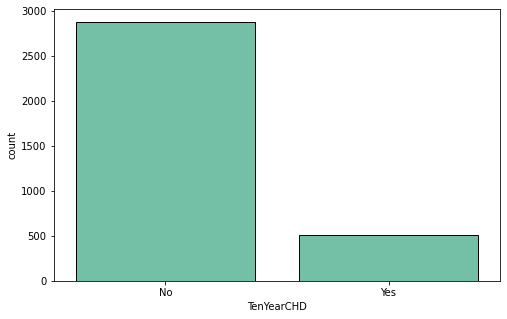

In [105]:
# recordemos como estaban distribuidos nuestros datos

plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "TenYearCHD",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

## Downsampling, con Tomek de (SMOTE)

In [106]:
df.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,1,2.0,1,0.0,0.0,0.0,0.0,1.0,1.682783,-0.506751,-0.077350,-0.358276,0.690879,0.176093,0.064553,1.171617
1,2.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,-0.412284,0.083414,0.523186,0.286026,-0.744824,-0.988457,-1.325505,1.004509
2,4.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,1.682783,1.769600,-0.206036,0.086070,0.174923,0.176093,0.151952,-0.499456
3,7.0,0,4.0,1,0.0,0.0,0.0,0.0,0.0,-1.576210,2.191146,-0.806571,1.285805,-1.372943,-1.238003,0.573040,-1.334993
4,8.0,1,2.0,1,0.0,0.0,0.0,0.0,0.0,-0.994247,0.926507,-0.120245,-0.380493,-0.296167,-0.406182,-1.240314,0.837402


In [107]:
# para aplicar este método lo primero que tenemos que hacer es separar en X e y y en train y test como aprendimos en la lecciones de 
#regresion lineal
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)


#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [108]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

 

---
El resultado es : 

In [120]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución after del ajuste \n {y_train_res.value_counts()}")

Distribution before resampling 
 0.0    2020
1.0     353
Name: TenYearCHD, dtype: int64
..............................................................
Distribución después del ajuste 
 0.0    1885
1.0    1885
Name: TenYearCHD, dtype: int64


## Downsampling, usando RandomUnderSample

In [110]:
# iniciamos el método

down = RandomUnderSampler()

In [111]:
# ajustamos el modelo
X_down, y_down = down.fit_resample(X,y)

---
El resultado es : 

In [121]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y.value_counts()}" )
print("..............................................................")
print (f"Distribución after del ajuste \n {y_down.value_counts()}")

Distribution before resampling 
 0.0    2879
1.0     511
Name: TenYearCHD, dtype: int64
..............................................................
Distribución después del ajuste 
 0.0    511
1.0    511
Name: TenYearCHD, dtype: int64


### Upsampling

In [113]:
# iniciamos el método

upp = RandomOverSampler()

In [114]:
# como siempre, ajustamos el modelo

X_upp, y_upp = upp.fit_resample(X, y)

In [115]:
y_upp.value_counts()

0.0    2879
1.0    2879
Name: TenYearCHD, dtype: int64

---
El resultado es : 

In [122]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y.value_counts()}" )
print("..............................................................")
print (f"Distribución after del ajuste \n {y_upp.value_counts()}")

Distribution before resampling 
 0.0    2879
1.0     511
Name: TenYearCHD, dtype: int64
..............................................................
Distribución después del ajuste 
 0.0    2879
1.0    2879
Name: TenYearCHD, dtype: int64


In [117]:
# juntamos los dos elementos creados y voilà! 

balanceado_upp = pd.concat([X_upp, y_upp], axis = 1)
balanceado_upp.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0.0,1,2.0,1,0.0,0.0,0.0,0.0,1.682783,-0.506751,-0.077350,-0.358276,0.690879,0.176093,0.064553,1.171617,1.0
1,2.0,1,1.0,1,0.0,0.0,0.0,0.0,-0.412284,0.083414,0.523186,0.286026,-0.744824,-0.988457,-1.325505,1.004509,0.0
2,4.0,1,1.0,1,0.0,0.0,0.0,0.0,1.682783,1.769600,-0.206036,0.086070,0.174923,0.176093,0.151952,-0.499456,0.0
3,7.0,0,4.0,1,0.0,0.0,0.0,0.0,-1.576210,2.191146,-0.806571,1.285805,-1.372943,-1.238003,0.573040,-1.334993,0.0
4,8.0,1,2.0,1,0.0,0.0,0.0,0.0,-0.994247,0.926507,-0.120245,-0.380493,-0.296167,-0.406182,-1.240314,0.837402,0.0


In [118]:
# juntamos los dos elementos creados 

balanceado_down = pd.concat([X_train_res, y_train_res], axis = 1)
balanceado_down.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,448.0,0,1.0,0,0.0,0.0,1.0,0.0,1.333605,-0.759679,0.566081,-0.802622,1.431163,0.883142,0.470811,0.168973,1.0
1,1774.0,0,1.0,1,0.0,0.0,0.0,0.0,-0.412284,4.298878,-0.120245,1.063632,-0.520495,-0.073453,0.444036,-0.499456,0.0
2,866.0,0,2.0,0,0.0,0.0,1.0,0.0,1.682783,-0.759679,0.480291,-1.135882,0.511416,-0.572546,1.322722,-1.167886,0.0
3,2101.0,0,2.0,0,0.0,0.0,1.0,0.0,0.984427,-0.759679,-1.021048,-0.158320,-0.206435,0.425640,0.044855,-0.081688,0.0
4,2686.0,1,1.0,0,0.0,0.0,0.0,0.0,0.984427,-0.759679,-0.291827,-0.180538,-0.206435,-0.572546,1.629409,-0.666564,0.0


In [119]:
# lo siguiente que tendríamos que hacer, es juntar X_down e y_down para tener nuestro dataframe preparado para el siguiente paso

balanceado_down2 = pd.concat([X_down, y_down], axis = 1)
balanceado_down2.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,918.0,0,1.0,1,0.0,0.0,0.0,0.0,-0.179499,1.769600,1.295303,-1.935705,-0.228868,-0.655728,0.195765,-0.081688,0.0
1,1429.0,1,3.0,1,0.0,0.0,0.0,0.0,-0.179499,0.926507,0.051337,0.352678,-1.238346,-1.986643,-1.551870,-1.167886,0.0
2,2076.0,1,2.0,0,0.0,0.0,1.0,0.0,1.449998,-0.759679,-0.163140,0.197157,1.722790,1.507008,-0.466292,-0.081688,0.0
3,2752.0,0,1.0,1,0.0,0.0,0.0,0.0,0.053287,0.926507,-0.163140,-0.136103,-0.296167,-0.572546,-1.369317,2.007153,0.0
4,1786.0,1,1.0,1,0.0,0.0,0.0,0.0,0.053287,1.769600,0.094232,-0.758187,-0.184002,-0.073453,-1.656533,-1.752761,0.0


Preguntar si quitamos id del balanceado, nos lo usa